<a href="https://colab.research.google.com/github/esrayuzgec/AlzheimerDetection/blob/main/AlzheimerData2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"esrayuzgec","key":"38d38662eddc4827ce5088ed6044748a"}'}

In [ ]:
!mkdir –p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600  ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d basheersaeed/alzheimers-brain-mri

 98% 721M/738M [00:06<00:00, 85.9MB/s]
100% 738M/738M [00:06<00:00, 115MB/s] 


In [ ]:
from zipfile import ZipFile
file_name="alzheimers-brain-mri.zip"

In [ ]:
with ZipFile(file_name,'r') as zip:  #Zip halinde gelenn dosyayı  açtık
  zip.extractall()
  print('done')

done


In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 17.9MB/s 
     |████████████████████████████████| 194kB 52.6MB/s 
     |████████████████████████████████| 51kB 8.5MB/s 
     |████████████████████████████████| 1.2MB 54.9MB/s 
     |████████████████████████████████| 776.8MB 23kB/s 
     |████████████████████████████████| 61kB 105kB/s 
     |████████████████████████████████| 12.8MB 248kB/s 
     |████████████████████████████████| 51kB 7.9MB/s 
ERROR: torchtext 0.9.0 has requirement torch==1.8.0, but you'll have torch 1.7.1 which is incompatible.
Mounted at /content/gdrive


In [ ]:
from fastai.vision.all import *

In [ ]:
path=Path("/content/MRI/Training")
path.ls()

(#3) [Path('/content/MRI/Training/AD'),Path('/content/MRI/Training/.ipynb_checkpoints'),Path('/content/MRI/Training/CN')]

In [ ]:
item_tfms = RandomResizedCrop(128)
batch_tfms = [*aug_transforms(size=224, max_warp=0.1,mult=2,max_rotate=2,min_zoom=0.9,max_zoom=1.1,max_lighting=0.1), Normalize.from_stats(*imagenet_stats)]

In [ ]:
brain = DataBlock(blocks=(ImageBlock,CategoryBlock),
                  get_items= get_image_files,
                  get_y = parent_label,
                  splitter =RandomSplitter(valid_pct= 0.2, seed=42),
                  item_tfms = item_tfms,
                  batch_tfms=batch_tfms,
                  )

In [ ]:
dls = brain.dataloaders(path,bs=32)

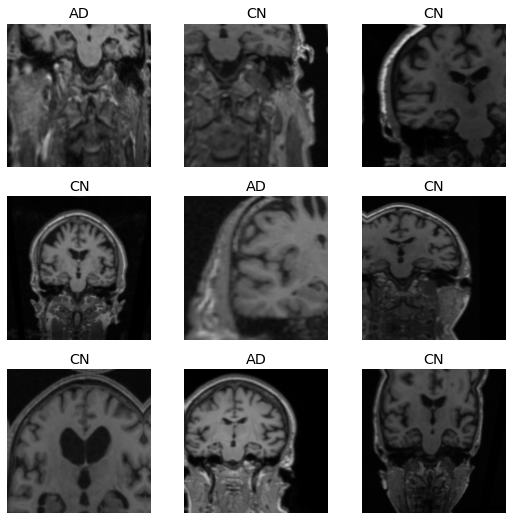

In [ ]:
dls.show_batch(max_n=9,unique=False)

In [ ]:
learn= cnn_learner(dls,vgg16_bn, pretrained=True, metrics=[accuracy,error_rate])

SuggestedLRs(lr_min=0.001096478197723627, lr_steep=1.5848931980144698e-06)

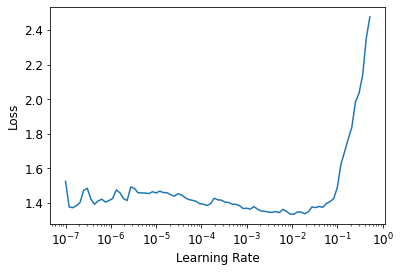

In [ ]:
learn.lr_find()

In [ ]:
learn.fine_tune(5,1.4e-3)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.315095,0.745521,0.550000,0.450000,00:25


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.221939,0.871007,0.512500,0.487500,00:26
1,1.224074,0.890092,0.487500,0.512500,00:26
2,1.213208,0.615922,0.650000,0.350000,00:26
3,1.128384,0.646820,0.700000,0.300000,00:26
4,1.086660,0.652652,0.662500,0.337500,00:26


In [ ]:
learn.unfreeze()

SuggestedLRs(lr_min=1.0964781722577755e-07, lr_steep=6.309573450380412e-07)

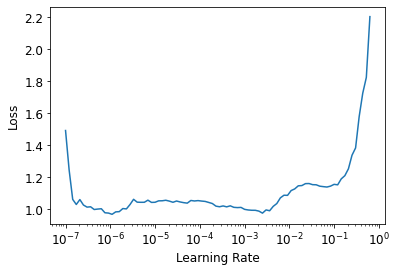

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(5, 1e-4)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.843938,0.728907,0.625000,0.375000,00:26
1,0.821057,0.623598,0.775000,0.225000,00:26
2,0.789590,0.530352,0.750000,0.250000,00:26
3,0.805708,0.716835,0.712500,0.287500,00:26
4,0.823801,0.634056,0.762500,0.237500,00:26


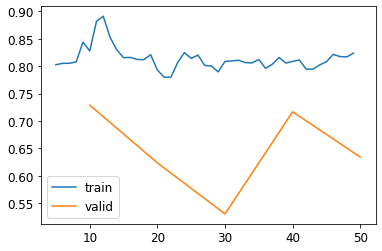

In [ ]:
learn.recorder.plot_loss()

In [ ]:
interp=ClassificationInterpretation.from_learner(learn)

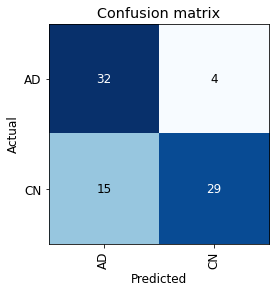

In [ ]:
interp.plot_confusion_matrix()

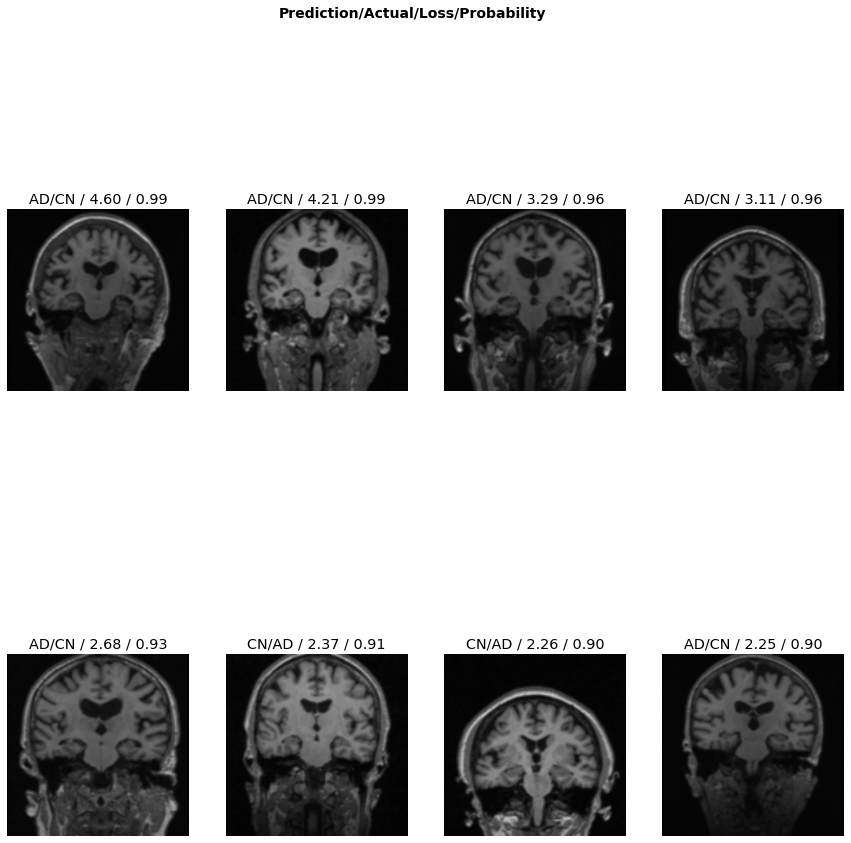

In [ ]:
interp.plot_top_losses(8, figsize=(15,15))